# 层次聚类方法

---

### 实验介绍

层次聚类可以帮助有效避免划分聚类时需要提前指定类别数量的麻烦，除此之外还能在一些特定场景中得到应用。

### 实验知识点

- 自底向上层次聚类
- 自顶向下层次聚类
- BIRCH 聚类
- PCA 降维

### 实验目录

- <a href="#层次聚类方法概述">层次聚类方法概述</a>
- <a href="#自底向上层次聚类法">自底向上层次聚类法</a>
- <a href="#自顶向下层次聚类法">自顶向下层次聚类法</a>
- <a href="#BIRCH-聚类算法">BIRCH 聚类算法</a>
- <a href="#实验总结">实验总结</a>

## 层次聚类方法概述

K-Means 算法可以说是用处非常广泛的聚类算法之一，它非常好用。但是，当你使用过这种算法之后，你就会发现一个比较让人「头疼」的问题，那就是我们需要手动指定 K 值，也就是聚类的类别数量。

预先确定聚类的类别数量看起来是个小事情，但是在很多时候是比较麻烦的，因为我们可能在聚类前并不知道数据集到底要被聚成几类。例如，下面的示意图中，感觉聚成 2 类或者 4 类都是比较合理的。

![](https://upload-images.jianshu.io/upload_images/15406304-2de0c0a72822374e.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

今天要学习的层次聚类方法与划分聚类最大的区别之一，就是我们**无需提前指定需要聚类类别的数量**。这听起来是非常诱人的，到底是怎样做到的呢？

简单来讲，层次聚类方法的特点在于通过计算数据集元素间的相似度来生成一颗具备层次结构的树。首先在这里强调一点，这里的「层次树」和第二周课程中学习的「决策树」是完全不同，不要混淆。

与此同时，当我们使用层次聚类方法时，可以根据创建树的方式分为两种情况：

- **自底向上层次聚类法**：该方法的过程被称为「凝聚」(Agglomerative)，也就是把数据集中的每个元素看作是一个类别，然后进行迭代合并成为更大的类别，直到满足某个终止条件。

- **自顶向下层次聚类法**：该方法的过程被称为「分裂」(Divisive)，也就是凝聚的反向过程。首先，把数据集看作是一个类别，然后递归地划分为多个较小的子类，直到满足某个终止条件。

## 自底向上层次聚类法

自底向上层次聚类法也就是 Agglomerative Clustering 算法。这种算法的主要特点在于，我们使用「自底向上」进行聚类的思路来帮助距离相近的样本被放在同一类别中。

### 自底向上层次聚类流程

具体来讲，这种方法的主要步骤如下：

对于数据集 $D$，$D=\left ( {x_1,x_2,\cdots,x_n} \right )$：

1. 将数据集中每个样本标记为 `1` 类，即 $D$ 初始时包含的类别（Class）为 $C$，$C=\left ( {c_1,c_2,\cdots,c_n} \right )$。
2. 计算并找出 $C$ 中距离最近的 `2` 个类别，合并为 `1` 类。
3. 依次合并直到最后仅剩下一个列表，即建立起一颗完整的层次树。

我们通过下图来演示自底向上层次聚类法的过程，首先平面上有 5 个样本点，我们将每个样本点都单独划为 1 类。

![](https://upload-images.jianshu.io/upload_images/15406304-80fd94ea9cc60d5c.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

接下来，我们可以计算元素间的距离，并将距离最近的合并为 1 类。于是，总类别变为 3 类。

![](https://upload-images.jianshu.io/upload_images/15406304-6db0edccafb523b2.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

重复上面的步骤，总类别变为 2 类。

![](https://upload-images.jianshu.io/upload_images/15406304-e48ea14198a9e4c0.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

最后，合并为 1 类，聚类终止。

![](https://upload-images.jianshu.io/upload_images/15406304-e8a9b8fa07bdad66.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

我们将上面的聚类过程变为层次树就为：

![](https://upload-images.jianshu.io/upload_images/15406304-69ed4d7093393da8.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

### 距离计算方法

虽然聚类过程看似简单，但不知道你是否意识到一个问题：**当一个类别中包含多个元素时，类别与类别之间的距离是怎样确定的呢？**

也就是说，上面的演示过程中，为什么要把 $5$ 归为 $<3, 4>$ 组成的那一类，而不是 $<1, 2>$ 组成的类呢？或者说，为什么不先把 $<1, 2>$ 与 $<3, 4>$ 合并，最后才合并 $
5$ 呢？

这就涉及到 Agglomerative 聚类过程中的距离计算方式。简单来讲，我们一般有 3 种不同的距离计算方式：

#### 单连接（Single-linkage）

单连接的计算方式是根据两种类别之间**最近**的元素间距离作为两类别之间的距离。

![](https://upload-images.jianshu.io/upload_images/15406304-981e031f32b79966.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

#### 全连接（Complete-linkage）

全连接的计算方式是根据两种类别之间**最远**的元素间距离作为两类别之间的距离。

![](https://upload-images.jianshu.io/upload_images/15406304-f73d0365a08d2151.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

#### 平均连接（Average-linkage）

平均连接的计算方式是依次计算两种类别之间两两元素间距离，并最终求得平均值作为两类别之间的距离。

![](https://upload-images.jianshu.io/upload_images/15406304-f46520a9df14e01d.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

#### 中心连接（Center-linkage）

平均连接虽然看起来更加合理，但是两两元素间的距离计算量往往非常庞大。有时候，也可以使用中心连接计算方法。即先计算类别中心，再以中心连线作为两类别之间的距离。

![](https://upload-images.jianshu.io/upload_images/15406304-e981f5d29c8d3944.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

总之，上面 4 种距离计算方法中，**一般常用「平均连接」和「中心连接」**方法，因为「单连接」和「全连接」都相对极端，容易受到噪声点和分布不均匀数据造成的干扰。

### Agglomerative 聚类 Python 实现

下面，我们尝试通过 Python 实现自底向上层次聚类算法。首先导入实验必要的模块：

In [1]:
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt
%matplotlib inline

然后，通过 `make_blobs` 方法随机生成一组示例数据，且使得示例数据呈现出 2 类数据的趋势。这里，我们设定随机数种子 `random_state=10` 以保证你的结果和实验结果一致。

In [2]:
data = datasets.make_blobs(10, n_features=2, centers=2, random_state=10)
data

(array([[  6.04774884, -10.30504657],
        [  2.90159483,   5.42121526],
        [  4.1575017 ,   3.89627276],
        [  1.53636249,   5.11121453],
        [  3.88101257,  -9.59334486],
        [  1.70789903,   6.00435173],
        [  5.69192445,  -9.47641249],
        [  5.4307043 ,  -9.75956122],
        [  5.85943906,  -8.38192364],
        [  0.69523642,   3.23270535]]), array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1]))

使用 Matplotlib 绘制示例数据结果，可以看到数据的确呈现出 `2` 种类别的趋势。其中 `data[1]` 的结果即为生成数据时预设的类别，当然接下来的聚类过程，我们是不知道数据的预设类别。

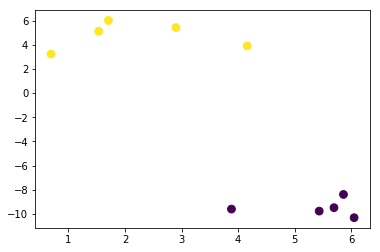

In [3]:
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], s=60)

首先，我们实现欧式距离的计算函数：

In [4]:
"""欧式距离
"""
def euclidean_distance(a, b):
    """
    参数:
    a -- 数组 a
    b -- 数组 b
    
    返回:
    dist -- a, b 间欧式距离
    """
    x = float(a[0]) - float(b[0])
    x = x * x
    y = float(a[1]) - float(b[1])
    y = y * y
    dist = round(np.sqrt(x + y), 2)
    return dist

然后，实现 Agglomerative 聚类函数，这里使用中心连接的方法。为了更加具体的展示层次聚类的过程，这里在函数中添加一些多余的 `print()` 函数。

In [5]:
"""Agglomerative 聚类计算过程
"""
def agglomerative_clustering(data):
    
    while len(data) > 1:
        print("☞ 第 {} 次迭代\n".format(10 - len(data) + 1))
        min_distance = float('inf') # 设定初始距离为无穷大
        for i in range(len(data)):
            print("---")
            for j in range(i + 1, len(data)):
                distance = euclidean_distance(data[i], data[j])
                print("计算 {} 与 {} 距离为 {}".format(data[i], data[j],distance))
                if distance < min_distance:
                    min_distance = distance
                    min_ij = (i, j)
        i, j = min_ij # 最近数据点序号
        data1 = data[i]
        data2 = data[j]
        data = np.delete(data, j, 0) # 删除原数据
        data = np.delete(data, i, 0) # 删除原数据
        b = np.atleast_2d([(data1[0] + data2[0]) / 2, (data1[1] + data2[1]) / 2]) # 计算两点新中心
        data = np.concatenate((data, b), axis=0) # 将新数据点添加到迭代过程
        print("\n最近距离:{} & {} = {}, 合并后中心:{}\n".format(data1, data2, min_distance, b))
        
    return data

In [6]:
agglomerative_clustering(data[0])

☞ 第 1 次迭代

---
计算 [  6.04774884 -10.30504657] 与 [2.90159483 5.42121526] 距离为 16.04
计算 [  6.04774884 -10.30504657] 与 [4.1575017  3.89627276] 距离为 14.33
计算 [  6.04774884 -10.30504657] 与 [1.53636249 5.11121453] 距离为 16.06
计算 [  6.04774884 -10.30504657] 与 [ 3.88101257 -9.59334486] 距离为 2.28
计算 [  6.04774884 -10.30504657] 与 [1.70789903 6.00435173] 距离为 16.88
计算 [  6.04774884 -10.30504657] 与 [ 5.69192445 -9.47641249] 距离为 0.9
计算 [  6.04774884 -10.30504657] 与 [ 5.4307043  -9.75956122] 距离为 0.82
计算 [  6.04774884 -10.30504657] 与 [ 5.85943906 -8.38192364] 距离为 1.93
计算 [  6.04774884 -10.30504657] 与 [0.69523642 3.23270535] 距离为 14.56
---
计算 [2.90159483 5.42121526] 与 [4.1575017  3.89627276] 距离为 1.98
计算 [2.90159483 5.42121526] 与 [1.53636249 5.11121453] 距离为 1.4
计算 [2.90159483 5.42121526] 与 [ 3.88101257 -9.59334486] 距离为 15.05
计算 [2.90159483 5.42121526] 与 [1.70789903 6.00435173] 距离为 1.33
计算 [2.90159483 5.42121526] 与 [ 5.69192445 -9.47641249] 距离为 15.16
计算 [2.90159483 5.42121526] 与 [ 5.4307043  -9.75956122] 距离为 1

array([[ 3.40447914, -2.70986843]])

通过上面的计算过程，你应该能很清晰地看出 Agglomerative 聚类的完整过程了。我们将 `data` 数组的每行依次按 `0-9` 编号，并将计算过程绘制成层次聚类的二叉树结构如下：
<img width='500px' src="https://upload-images.jianshu.io/upload_images/15406304-d9f08894ddc530f8.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240"></img>

建立好树形结构后，如果我们想取类别为 2，就从顶部画一条横线就可以了。然后，沿着网络延伸到叶节点就能找到各自对应的类别。如下图所示：
<img width='500px' src="https://upload-images.jianshu.io/upload_images/15406304-7efd413efd0ac812.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240"></img>

如果你对着 `data` 预设的类别，你会发现最终的聚类结果和 `data[1] = [0, 1, 1, 1, 0, 1, 0, 0, 0, 1]`完全一致。

至此，我们就完整实现了自底向上层次聚类法。

### 使用 scikit-learn 完成 Agglomerative 聚类

scikit-learn 中也提供了 Agglomerative 聚类的类，相应的参数解释如下：

```python
sklearn.cluster.AgglomerativeClustering(n_clusters=2, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', pooling_func=<function mean>)
```

其中：

- `n_clusters`: 表示最终要查找类别的数量，例如上面的 2 类。
- `affinity`: 亲和力度量，有 `euclidean`（欧式距离）, `l1`（L1 范数）, `l2`（L2 范数）, `manhattan`（曼哈顿距离）等可选。
- `linkage`: 连接方法：`ward`（单连接）, `complete`（全连接）, `average`（平均连接）可选。

实验同样使用上面的数据集完成模型构建并聚类：

In [7]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
model.fit_predict(data[0])

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0])

可以看到，最终的聚类结构和我们上面是一致的。（表示类别的 `1, 0` 相反没有影响）

## 自顶向下层次聚类法

除了上面讲到的自底向上的层次聚类法，还有一类是自顶向下层次聚类法，这种方法的计算流程与前一种正好相反，但过程要复杂很多。

大致说来，我们首先将全部数据归为一类，然后逐步分割成小类，而这里的分割方法又有常见的 2 种形式：

### 利用 K-Means 算法进行分割

首先，我们说一说利用 K-Means 算法分割方法：

1. 把数据集 $D$ 归为单个类别 $C$ 作为顶层。
2. 使用 K-Means 算法把 $C$ 划分成 2 个子类别，构成子层；
3. 可递归使用 K-Means 算法继续划分子层到终止条件。

同样，我们可以通过示意图来演示该聚类算法的流程。

首先，全部数据在一个类别中：

![](https://upload-images.jianshu.io/upload_images/15406304-81d443b3c0ada8c1.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

然后，通过 K-Means 算法把其聚成 `2` 类。

![](https://upload-images.jianshu.io/upload_images/15406304-f7033591cb0be739.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

紧接着，将子类再分别使用 K-Means 算法聚成 `2` 类。

![](https://upload-images.jianshu.io/upload_images/15406304-9667208efaea6a3b.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

最终，直到所以的数据都各自为 1 个类别，即分割完成。

![](https://upload-images.jianshu.io/upload_images/15406304-b7b420e270a2b19c.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

利用 K-Means 算法进行自顶向下层次聚类过程同样属于看起来简单，但计算量庞大的过程。

### 利用平均距离进行分割

1. 把数据集 $D$ 归为单个类别 $C$ 作为顶层。
2. 从类别 $C$ 中取出点 $d$，使得 $d$ 满足到 $C$ 中其他点的平均距离最远，构成类别 $N$。
3. 继续从类别 $C$ 中取出点 $d'$, 使得 $d'$ 满足到 $C$ 中其他点的平均距离与到 $N$ 中点的平均距离之间的差值最大，并将点放入 $N$。
4. 重复步骤 `3`，直到差值为负数。
5. 再从子类中重复步骤 `2`,`3`,`4` 直到全部点单独成类，即完成分割。

同样，我们可以通过示意图来演示该聚类算法的流程。

首先，全部数据在一个类别中：

![](https://upload-images.jianshu.io/upload_images/15406304-ad0a4b9141c011e9.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

然后，我们依次抽取 1 个数据点，并计算它与其他点的平均距离，且最终取平均距离最大的点单独成类。例如这里计算出结果为 5。

![](https://upload-images.jianshu.io/upload_images/15406304-edfcd9344bf87651.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

同样，从剩下的 4 个点再取出一个点，使该点到剩下点的平均距离与该点到点 5 的距离差值最大且不为负数。这里没有点满足条件，终止。

接下来，从剩下的 4 个点中再取出一个点，并计算它与其他 3 点的距离，取最大单独成类。

![](https://upload-images.jianshu.io/upload_images/15406304-d7b92af41949aad8.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

同样，从剩下的 3 个点中再取出一个点，使该点到剩下点的平均距离与该点到点 4 的距离差值最大且不为负数，合并为 1 类。点 3 明显满足：

![](https://upload-images.jianshu.io/upload_images/15406304-0cf7bddfb63ea04d.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

重复步骤，继续计算形成子层。然后对子层中包含有对应元素的类重复上面的步骤聚类，直到全部点单独成类，即完成分割。

自顶向下层次聚类法在实施过程中常常遇到一个问题，那就是如果两个样本在上一步聚类中被划分成不同的类别，那么即使这两个点距离非常近，后面也不会被放到一类中。

所以在实际应用中，自顶向下层次聚类法没有自底而上的层次聚类法常用，这里也就不再进行实现了，了解其运行原理即可。

## BIRCH 聚类算法

除了上文提到的两种层次聚类方法，还有一种非常常用且高效的层次聚类法，叫做 BIRCH。

BIRCH 的全称为 Balanced Iterative Reducing and Clustering using Hierarchies，直译过来就是「使用层次方法的平衡迭代规约和聚类」。该算法由时任 IBM 工程师 Tian Zhang 于 1996 年发明，详见 [论文](http://www.cs.sfu.ca/CourseCentral/459/han/papers/zhang96.pdf)。

BIRCH 最大的特点就是高效，可用于大型数据集的快速聚类。

### $CF$  聚类特征

BIRCH 的聚类过程主要是涉及到 $CF$  聚类特征和 $CF$  Tree 聚类特征树的概念。所以，我们需要先了解什么是聚类特征。

一组样本的 $CF$  聚类特征定义为如下所示的三元组：

$$CF = \langle ( N, LS, SS ) \rangle $$

其中， NN  表示该  CFCF  中拥有的样本点的数量；  LSLS  表示该  CFCF  中拥有的样本点各特征维度的和向量； SSSS  表示该  CFCF  中拥有的样本点各特征维度的平方和。

例如，我们有 5 个样本，分别为：$(1,3), (2,5), (1,3), (7,9), (8,8)$，那么：

- $N = 5$
- $LS = (1+2+1+7+8, 3+5+3+9+8) =(19, 28)$
- $SS = (1^2+2^2+1^2+7^2+8^2+3^2+5^2+3^2+9^2+8^2) = (307)$

于是，对应的 $CF$ 值就为：

$$ CF = \langle 5, (19,28), (307) \rangle $$

$CF$ 拥有可加性，例如当 $CF'= \langle 3, (35, 36), 857 \rangle$ 时：

$$
CF' + CF = \langle 5, (19,28), (307) \rangle + \langle 3, (12, 26), 87 \rangle = \langle 8, (31, 54), (394) \rangle
$$

$CF$ 聚类特征本质上是定义类别（簇）的信息，并有效地对数据进行压缩。

### $CF$  聚类特征树

接下来，我们介绍第二个概念 $CF$  聚类特征树。

$CF$ 树由根节点（root node）、枝节点（branch node）和叶节点（leaf node）构成。另包含有三个参数，分别为：枝平衡因子 $\beta$、叶平衡因子 $\lambda$ 和空间阈值 $\tau$。而非叶节点（nonleaf node）中包含不多于 $\beta$ 个 $[CF,child_{i}]$ 的元项。

![](https://upload-images.jianshu.io/upload_images/15406304-4d4862f5c965bbe0.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

BIRCH 算法的核心就是基于训练样本建立了 $CF$ 聚类特征树。$CF$ 聚类特征树对应的输出就是若干个 $CF$ 节点，每个节点里的样本点就是一个聚类的类别。

其实，关于 $CF$  聚类特征树的特点以及树的生成过程还有很多内容可以深入学习，不过这里面涉及到大量的数学理论和推导过程，不太好理解，这里就不再展开了。有兴趣的同学可以阅读 [原论文](http://www.cs.sfu.ca/CourseCentral/459/han/papers/zhang96.pdf)。

最后，我们简单说一下 BIRCH 算法相比 Agglomerative 算法的优势，也就是总结学习 BIRCH 算法的必要性：

1. BIRCH 算法在建立 CF 特征树时只存储原始数据的特征信息，并不需要存储原始数据信息，内存开销上更优，计算高效。
2. BIRCH 算法只需要遍历一遍原始数据，而 Agglomerative 算法在每次迭代都需要遍历一遍数据，再次突出 BIRCH 的高效性。
3. BIRCH 属于在线学习算法，并支持对流数据的聚类，开始聚类时并不需要知道所有的数据。

### BIRCH 聚类实现

上面说了这么多，总结就是 BIRCH 属于层次聚类算法中非常高效的那一种方法。下面，就来看一看如何调用 scikit-learn 提供的 BIRCH 类完成聚类任务。

还记得第二周的手写字符识别挑战吗？我们当时使用了人工神经网络对 DIGITS 数据集进行了分类。其实，DIGITS 数据集也可以用来聚类，也就是当我们不知道数字的标签时，看一看相同的数字能否聚在一起呢？

同样，我们先导入 DIGITS 数据集，并查看前 5 个手写字符。还记得代码吗？

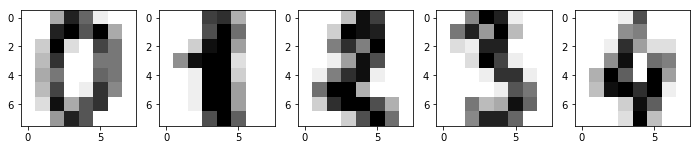

In [8]:
import numpy as np
from sklearn import datasets

digits = datasets.load_digits()

# 查看前 5 个字符
fig, axes = plt.subplots(1, 5, figsize=(12,4))
for i, image in enumerate(digits.images[:5]):
    axes[i].imshow(image, cmap=plt.cm.gray_r)

我们都知道，一个手写字符的数据是由 8x8 的矩阵表示。

In [17]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

如果我们针对该矩阵进行扁平化处理，就能变为 1x64 的向量。对于这样一个高维向量，虽然可以在聚类时直接计算距离，但却无法很好地在二维平面中表示相应的数据点。因为，二维平面中的点只由横坐标和纵坐标组成。

所以，为了尽可能还原聚类的过程，我们需要将 1x64 的行向量（64 维），处理成 1x2 的行向量（2 维），也就是降维的过程。

既然是降低维度，那么应该怎样做呢？是直接取前面两位数，或者随机取出两位？当然不是。这里学习一种新方法，叫 PCA 主成分分析。

### PCA 主成分分析（降维）

主成分分析是多元线性统计里面的概念，它的英文是：Principal Components Analysis，简称 PCA。主成分分析旨在降低数据的维数，通过保留数据集中的主要成分来简化数据集。

主成分分析的数学原理非常简单，通过对协方差矩阵进行特征分解，从而得出主成分（特征向量）与对应的权值（特征值）。然后剔除那些较小特征值（较小权值）对应的特征，从而达到降低数据维数的目的。

主成分分析通常有两个作用：

参考本文的目的，方便将数据用于低维空间可视化。聚类过程中的可视化是很有必要的。

高维度数据集往往就意味着计算资源的大量消耗。通过对数据进行降维，我们就能在不较大影响结果的同时，减少模型学习时间。

现在，假定我们需要将特征维度从 $n$ 维降到 $m$ 维，PCA 的计算流程如下：

**1.对各维度特征进行标准化处理：**

$$
x_j^{(i)}=\frac{x_j^{(i)}-\mu_j}{s_j}
$$

其中，$\mu_j$ 为特征 $j$ 的均值，$s_j$ 为特征 $j$ 的标准差。

**2.计算对应的协方差矩阵：**

$$
\Sigma = \frac{1}{m}\sum\limits_{i=1}^{m}(x^{(i)})(x^{(i)})^T = \frac{1}{m} \cdot X^TX
$$

**3.对协方差矩阵进行奇异值分解（SVD），得到特征向量：**

$$
(U,S,V^T) = SVD(\Sigma)
$$

**4.从 $U$ 中取出前 $m$ 个左奇异向量，构成一个约减矩阵 $U_{reduce}$ ：**

$$
U_{reduce} = (u^{(1)},u^{(2)},\cdots,u^{(k)})
$$

**5.计算新的特征向量 $z^{(i)}$：**

$$
z^{(i)}=U_{reduce}^T \cdot x^{(i)}
$$

**6.最后根据新的特征向量执行特征还原：**

$$
x_{new}=U_{reduce}z^{(i)}
$$

PCA 的过程听起来简单，执行起来还是比较麻烦的。所以，我们这里直接使用 scikit-learn 中 `PCA` 方法完成：

```python
sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False, svd_solver='auto')
```

其中：

*   `n_components=` 表示需要保留主成分（特征）的数量。
*   `copy=` 表示针对原始数据降维还是针对原始数据副本降维。当参数为 False 时，降维后的原始数据会发生改变，这里默认为 True。
*   `whiten=` 白化表示将特征之间的相关性降低，并使得每个特征具有相同的方差。
*   `svd_solver=` 表示奇异值分解 SVD 的方法。有 4 参数，分别是：`auto`, `full`, `arpack`, `randomized`。

在使用 PCA 降维时，我们也会使用到 `PCA.fit()` 方法。`.fit()` 是 scikit-learn 训练模型的通用方法，但是该方法本身返回的是模型的参数。所以，通常我们会使用 `PCA.fit_transform()` 方法直接返回降维后的数据结果。

下面，我们就针对 DIGITS 数据集进行特征降维。

In [9]:
from sklearn.decomposition import PCA

# PCA 将数据降为 2 维
pca = PCA(n_components=2)
pca_data = pca.fit_transform(digits.data)
pca_data

array([[ -1.25946593,  21.27488474],
       [  7.95761149, -20.76870059],
       [  6.9919218 ,  -9.95598634],
       ...,
       [ 10.801285  ,  -6.96025038],
       [ -4.87210427,  12.42395413],
       [ -0.34438867,   6.36555154]])

可以看到，每一行的特征已经由先前的 64 个缩减为 2 个了。

接下来将降维后的数据绘制到二维平面中。

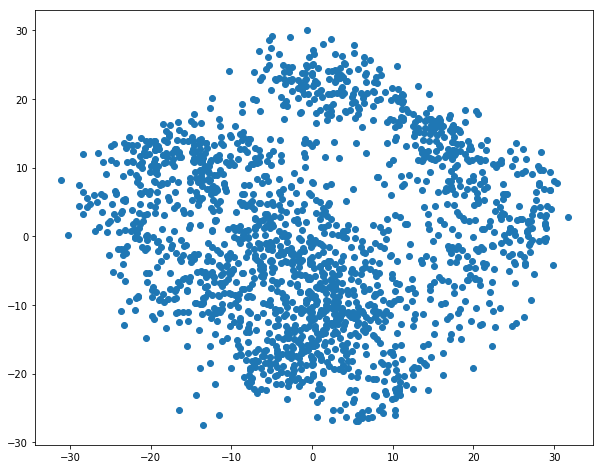

In [10]:
plt.figure(figsize=(10, 8))
plt.scatter(pca_data[:,0], pca_data[:,1])

上图就是 DIGITS 数据集中 1797 个样本通过 PCA 降维后对应在二维平面的数据点。

现在，我们可以直接使用 BIRCH 对降维后的数据进行聚类。由于我们提前知道这是手写数字字符，所以选择聚为 `10` 类。当然，在聚类时，我们只是知道大致要聚集的类别数量，而并不知道数据对应的标签值。

BIRCH 在 scikit-learn 对应的主要类及参数如下：

```python
sklearn.cluster.Birch(threshold=0.5, branching_factor=50, n_clusters=3, compute_labels=True, copy=True)
```

其中：

- `threshold`: 每个 CF 的空间阈值 $\tau$。参数值越小，则 CF 特征树的规模会越大，学习时花费的时间和内存会越多。默认值是 0.5，但如果样本的方差较大，则一般需要增大这个默认值。
- `branching_factor`: CF 树中所有节点的最大 CF 数。该参数默认为 50，如果样本量非常大，一般需要增大这个默认值。
- `n_clusters`: 虽然层次聚类无需预先设定类别数量，但可以设定期望查询的类别数。

接下来，使用 BIRCH 算法得到 PCA 降维后数据的聚类结果：

In [11]:
from sklearn.cluster import Birch

birch = Birch(n_clusters=10)
cluster_pca = birch.fit_predict(pca_data)
cluster_pca

/home/x/anaconda3/lib/python3.6/site-packages/sklearn/cluster/birch.py:77: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  node1_dist, node2_dist = dist[[farthest_idx]]


array([3, 0, 0, ..., 0, 5, 9])

利用得到的聚类结果对散点图进行着色。

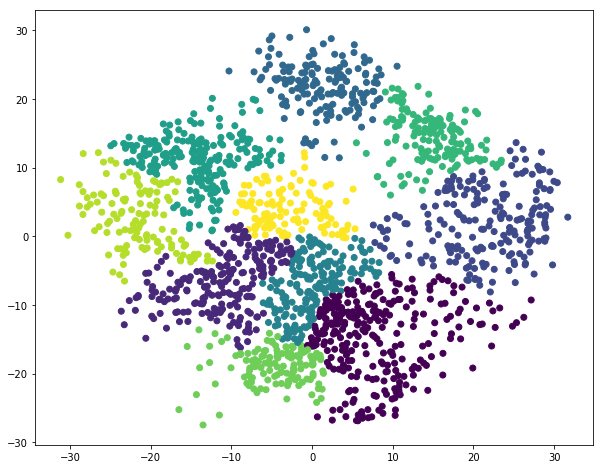

In [12]:
plt.figure(figsize=(10, 8))
plt.scatter(pca_data[:,0], pca_data[:,1],c=cluster_pca)

(-28.494448271059447, 31.09220178609622)

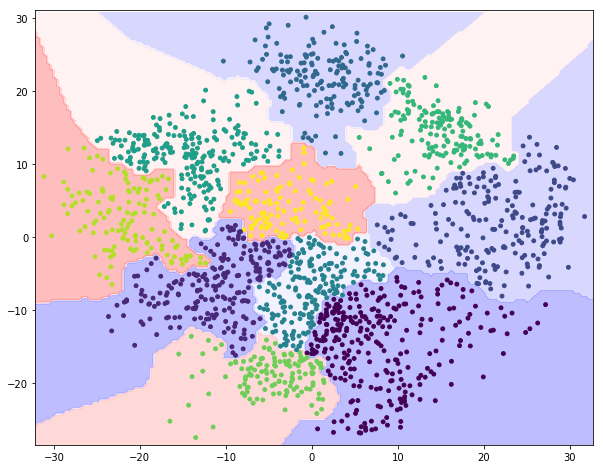

In [13]:
# 计算聚类过程中的决策边界
x_min, x_max = pca_data[:, 0].min() - 1, pca_data[:, 0].max() + 1
y_min, y_max = pca_data[:, 1].min() - 1, pca_data[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, .4), np.arange(y_min, y_max, .4))
temp_cluster = birch.predict(np.c_[xx.ravel(), yy.ravel()])

# 将决策边界绘制出来
temp_cluster = temp_cluster.reshape(xx.shape)
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, temp_cluster, cmap=plt.cm.bwr, alpha=.3)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_pca, s=15)

# 图像参数设置
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

其实，我们可以利用预先知道的各字符对应的标签对散点图进行着色，对比上面的聚类结果。

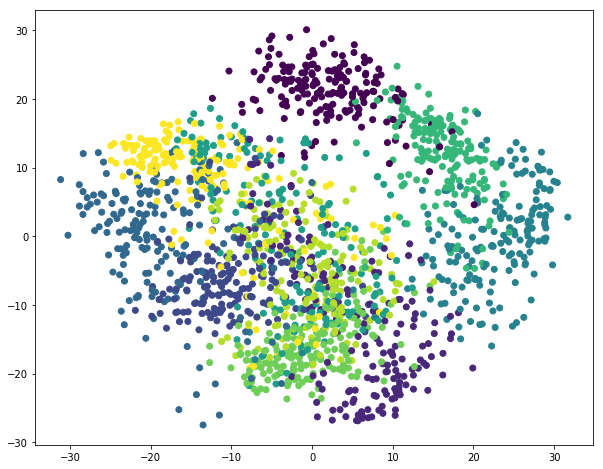

In [14]:
plt.figure(figsize=(10, 8))
plt.scatter(pca_data[:,0], pca_data[:,1],c=digits.target)

对照两幅图片，你会发现对 PCA 降维数据的聚类结果大致符合原数据的分布趋势。这里色块的颜色不对应没有关系，因为原标签和聚类标签的顺序不对应，只需要关注数据块的分布规律即可。

不过，使用真实标签绘制出来的散点图明显凌乱很多，这其实是由于 PCA 降维造成的。

一般情况下，我们输入到聚类模型中的数据不一定要是降维后的数据。下面输入原数据重新聚类试一试。

In [15]:
cluster_ori = birch.fit_predict(digits.data)
cluster_ori

/home/x/anaconda3/lib/python3.6/site-packages/sklearn/cluster/birch.py:77: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  node1_dist, node2_dist = dist[[farthest_idx]]


array([7, 9, 4, ..., 4, 1, 4])

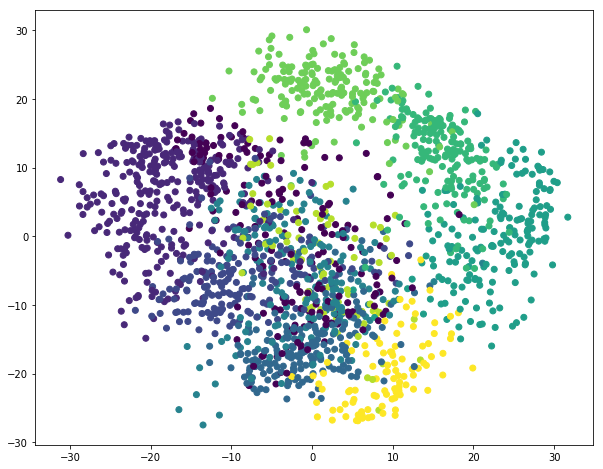

In [16]:
plt.figure(figsize=(10, 8))
plt.scatter(pca_data[:,0], pca_data[:,1],c=cluster_ori)

现在你会发现，实验得到的聚类结果更加符合原数据集的分布规律了。再次强调，这里颜色不分离其实是由于 PCA 降维后在二维平面可视化的效果，不代表真实的聚类效果。

不过，最后我们再强调一下 PCA 的使用情形。一般情况下，我们不会拿到数据就进行 PCA 处理，只有当算法不尽如人意、训练时间太长、需要可视化等情形才考虑使用 PCA。其主要原因是，PCA 被看作是对数据的有损压缩，会造成数据集原始特征丢失。

## 实验总结

本次试验了解了层次聚类方法，特别地学习了向上、向下以及 BIRCH 算法。其中，比较常用的是自底向上或 BIRCH 方法，且 BIRCH 拥有计算高效的特点。不过，BIRCH 也有一些弊端，例如对高维数据的聚类效果往往不太好，有时候我们也会使用 Mini Batch K-Means 进行替代。最后，通过表格对比本次实验的 3 种层次聚类法的优缺点：

![](https://upload-images.jianshu.io/upload_images/15406304-3ceee0cbac35b92a.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

回顾本次实验的知识点：

- 自底向上层次聚类
- 自顶向下层次聚类
- BIRCH 聚类
- PCA 降维

**拓展阅读：**

- [Hierarchical clustering - Wikipedia](https://en.wikipedia.org/wiki/Hierarchical_clustering)
- [BIRCH - Wikipedia](https://en.wikipedia.org/wiki/BIRCH)